## Py-imp is the section of the repo that is implemented using Python
- This notebook is the practical_01 data analysis and visualisation section

In [1]:
# Warning options (before all imports)
import warnings
warnings.filterwarnings('ignore')
# %xmode Verbose # simplified traceback when an exception occurs
%xmode Plain

Exception reporting mode: Plain


### Install needed packages

In [2]:
# Install a conda package in the current Jupyter kernel
import sys
# !conda install -c conda-forge --yes --prefix {sys.prefix} <pkg>

# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install <pkg>

In [3]:
# # upgrade pip
# !{sys.executable} -m pip install --upgrade pip

In [4]:
# !{sys.executable} -m pip install pandas==1.5.3
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install watermark
# !{sys.executable} -m pip install squarify

### Importing libraries

In [5]:
import os, random

import numpy as np
import squarify
from math import pi

# EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# To display charts in Jupyter
%matplotlib inline

# For reproducibility
rng = 777
os.environ['PYTHONHASHSEED'] = str(rng)
random.seed(rng)
np.random.seed(rng)

%load_ext autoreload
%autoreload 2

In [6]:
%load_ext watermark
# %watermark
%watermark --iversions

seaborn   : 0.13.2
sys       : 3.9.19 | packaged by conda-forge | (main, Mar 20 2024, 12:38:46) [MSC v.1929 64 bit (AMD64)]
matplotlib: 3.8.4
pandas    : 1.5.3
numpy     : 1.26.4
squarify  : 0.4.4



<a id="import-and-clean-data"></a>
## 1.   Import and Clean Data

In [7]:
dataset = sns.load_dataset("diamonds")

### Diamond Dataset Variables

- **carat**: Weight of the diamond
- **cut**: Quality of the diamond's cut (shape and symmetry)
- **color**: Colour of the diamond
- **clarity**: How clear and free of imperfections the diamond is
- **depth**: Height of diamond, as percentage of its width
- **table**: Width of diamond's top surface, as percentage
- **price**: How much the diamond costs
- **x**: Length of the diamond in millimeters
- **y**: Width of the diamond in millimeters
- **z**: Depth of the diamond in millimeters

<a id="data-analysis"></a>
## 2.   Data Analysis

In [8]:
## Display the first 5 rows of the dataset
dataset.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
## Calculate summary statistics for numeric columns
summary_stats = dataset.describe()
summary_stats

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
## Find the mean price of diamonds
mean_price = dataset['price'].mean()
mean_price

3932.799721913237

In [11]:
## Group by 'cut' and find the average price for each cut
avg_price_by_cut = dataset.groupby('cut')['price'].mean()
avg_price_by_cut

cut
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Good         3928.864452
Fair         4358.757764
Name: price, dtype: float64

In [12]:
## Find the most common 'colour' in the dataset
most_common_color = dataset['color'].mode()[0]
most_common_color

'G'

In [13]:
## Find the correlation between 'carat' and 'price'
correlation = dataset['carat'].corr(dataset['price'])
correlation

0.921591301193476

In [14]:
## Calculate the median depth of diamonds
median_depth = dataset['depth'].median()
median_depth

61.8

<a id="data-visualisation"></a>
## 3.   Data Visualisation

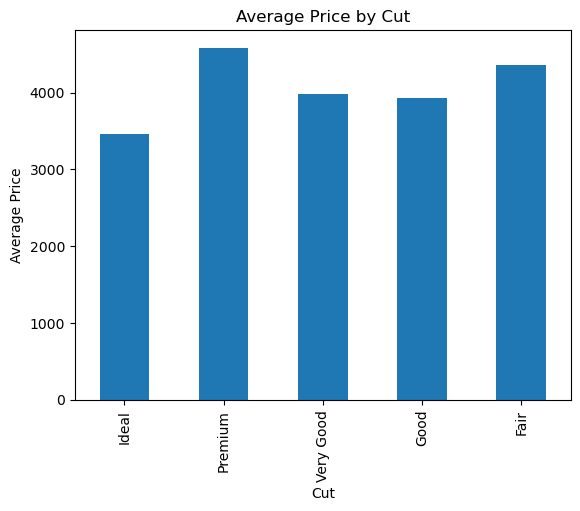

In [15]:
## Basic Charts
## Plot a bar chart of the average price by cut
avg_price_by_cut.plot(kind='bar')
plt.title('Average Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Average Price')
plt.show()

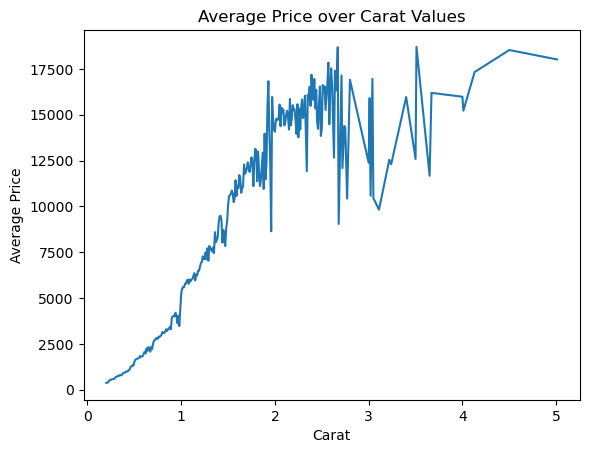

In [16]:
## Create a line chart of the average price over different carat values
avg_price_by_carat = dataset.groupby('carat')['price'].mean().reset_index()
plt.plot(avg_price_by_carat['carat'], avg_price_by_carat['price'])
plt.title('Average Price over Carat Values')
plt.xlabel('Carat')
plt.ylabel('Average Price')
plt.show()

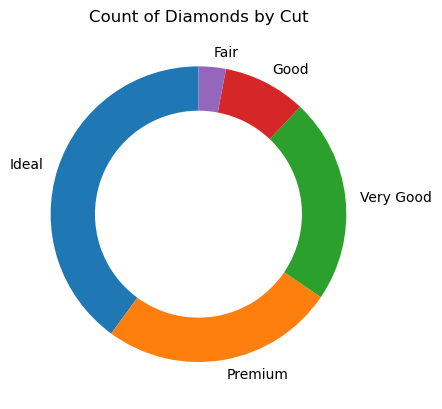

In [17]:
## Plot a donut chart of the count of diamonds by cut
cut_counts = dataset['cut'].value_counts()
plt.pie(cut_counts, labels=cut_counts.index, startangle=90, wedgeprops={'width': 0.3})
plt.title('Count of Diamonds by Cut')
plt.show()

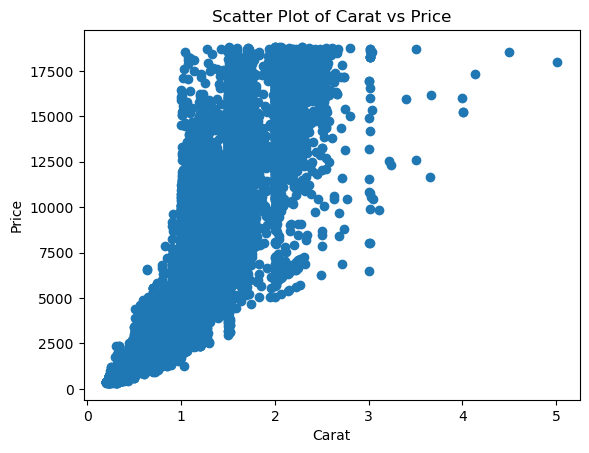

In [18]:
## Statistical Visualisations
## Create a scatter plot of 'carat' vs 'price'
plt.scatter(dataset['carat'], dataset['price'])
plt.title('Scatter Plot of Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

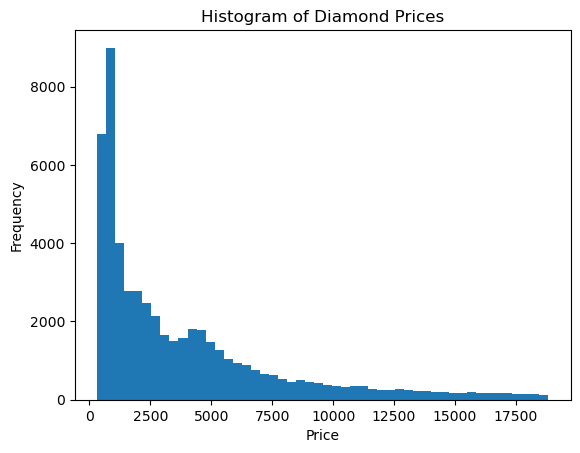

In [19]:
## Plot a histogram of diamond prices
plt.hist(dataset['price'], bins=50)
plt.title('Histogram of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

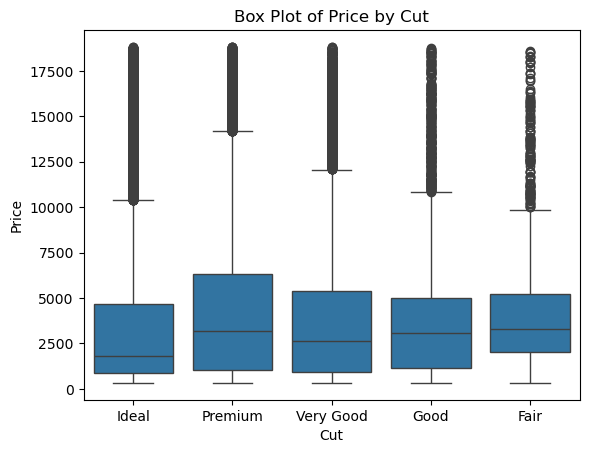

In [20]:
## Plot a box plot for 'price' by 'cut'
sns.boxplot(x='cut', y='price', data=dataset)
plt.title('Box Plot of Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

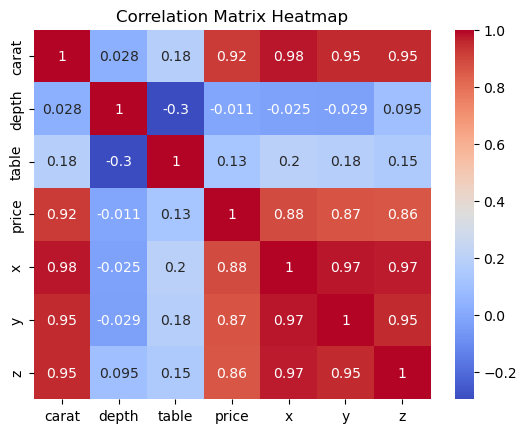

In [21]:
## Complex Data Representations
## Create a heatmap for the correlation matrix of the dataset
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

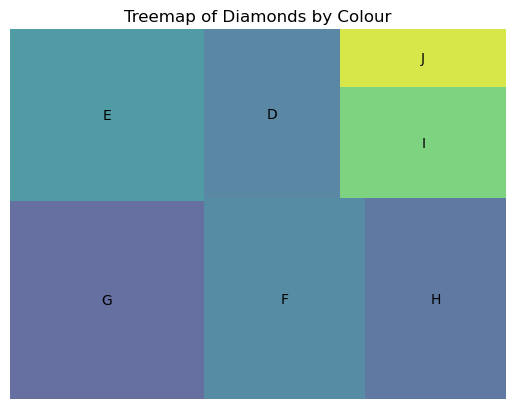

In [22]:
## Plot a treemap for the count of diamonds by colour
color_counts = dataset['color'].value_counts()
squarify.plot(sizes=color_counts, label=color_counts.index, alpha=.8)
plt.axis('off')
plt.title('Treemap of Diamonds by Colour')
plt.show()

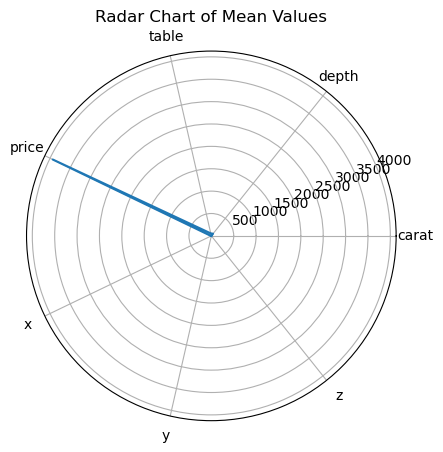

In [23]:
## Specialised Charts
## Create a radar chart for the mean values of numerical columns

# Make a list of number columns
categories = list(dataset.select_dtypes(include=[np.number]).columns)

# Count how many number columns there are
N = len(categories)

# Calculate average of each number column
values = dataset[categories].mean().tolist()

# Add the first value to the end
values += values[:1]

# Create points around a circle
angles = [n / float(N) * 2 * pi for n in range(N)]

# Add the first angle to the end
angles += angles[:1]

# Draw lines between the points
plt.polar(angles, values)

# Color inside the lines
plt.fill(angles, values, alpha=0.3)

# Label each point with its category name
plt.xticks(angles[:-1], categories)

# Add a title to the chart
plt.title('Radar Chart of Mean Values')

# Show the chart
plt.show()

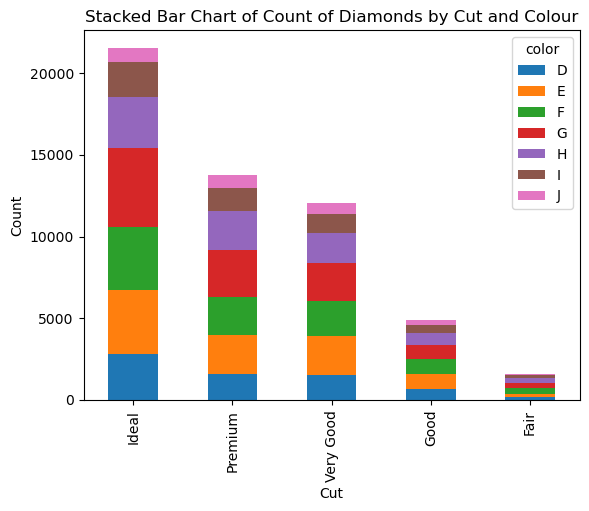

In [24]:
## Plot a stacked bar chart of the count of diamonds by cut and colour
cut_color_counts = dataset.groupby(['cut', 'color']).size().unstack()
cut_color_counts.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Count of Diamonds by Cut and Colour')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()